# *Convolutional Neural Network Project on the FASHION-MNIST Dataset.* 

### Let's Have a Brief Look at Fashion MNIST Dataset.


![alt text](https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png)
![alt text](https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/embedding.gif)

## Importing Libraries

In [6]:
import keras
from keras.datasets import fashion_mnist
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras. layers import Conv2D, MaxPooling2D
from keras import backend as K

import numpy as np
import matplotlib.pyplot as plt

import random

In [2]:
# Loading Datasets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


## Visualizing Example from Data

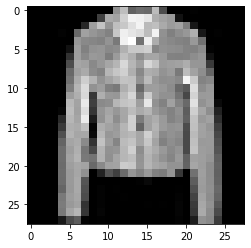

In [3]:
plt.imshow(x_test[10], cmap='gray')

In [4]:
y_test[10]

4

## Let's see what classes are in the Fashion MNIST dataset consisting of 10 classes!

In [7]:
fashion_mnist_labels = np.array([
                                'T-shirt/Top',
                                 'Pants',
                                 'Sweater',
                                 'Dress',
                                 'Jacket',
                                 'Sandals',
                                 'Shirt',
                                 'Sneakers',
                                 'Bag',
                                 'Boots'])

## Editing the Data

In [8]:
batch_size = 128 
num_classes = 10 
epochs = 6

img_rows, img_cols = 28, 28


if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [9]:
y_train_original = y_train.copy()
y_test_original = y_test.copy()
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## Building, Visualizing and Training the Model

**Or another option, instead of building the model from scratch, let's take the weights of the previously trained model from `model_fashion-mnist_cnn_train2_epoch24.h5` and preprocess the input images according to the model input.**

In [10]:
# model = load_model("save_models/model_fashion-mnist_cnn_train2_epoch24.h5")
model = Sequential() 

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

 
model.add(Conv2D(64, (3, 3), activation='relu'))


model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Dropout(0.25))


model.add(Flatten())


model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))


model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss = "categorical_crossentropy",
             optimizer = keras.optimizers.Adadelta(),
             metrics = ['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=24,
          verbose=1,
          validation_data=(x_test, y_test))


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)             

## Evaluating and Saving the Model 

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


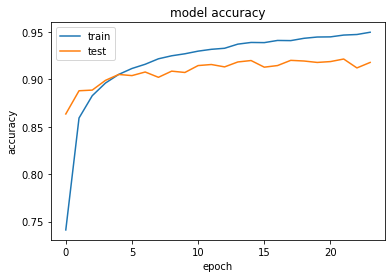

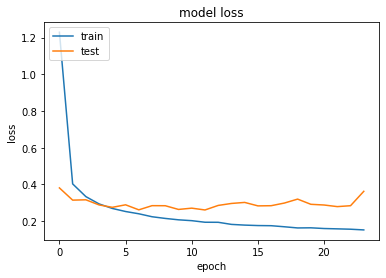

Test Loss: 0.36201892514526846
Test Accuracy: 0.9179999828338623


In [11]:
#list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

In [12]:
model_test = model.save('save_models/fashion_mnist_model_epoch24.h5')

## Testing the Model

**Testing a Random Input**

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

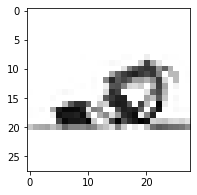

In [13]:
test_image = x_test[3200]
plt.figure(figsize=(3,3))
plt.imshow(test_image.reshape(28,28), cmap="binary")
y_test[3200]

In [14]:
test_data = x_test[3200].reshape(1,28,28,1)
pre=model.predict(test_data, batch_size=1)
max = pre.max()
for i in range(10):
    if pre[0][i] == max:
        print(i)

5


**Testing over 100 Random Inputs from the Data**

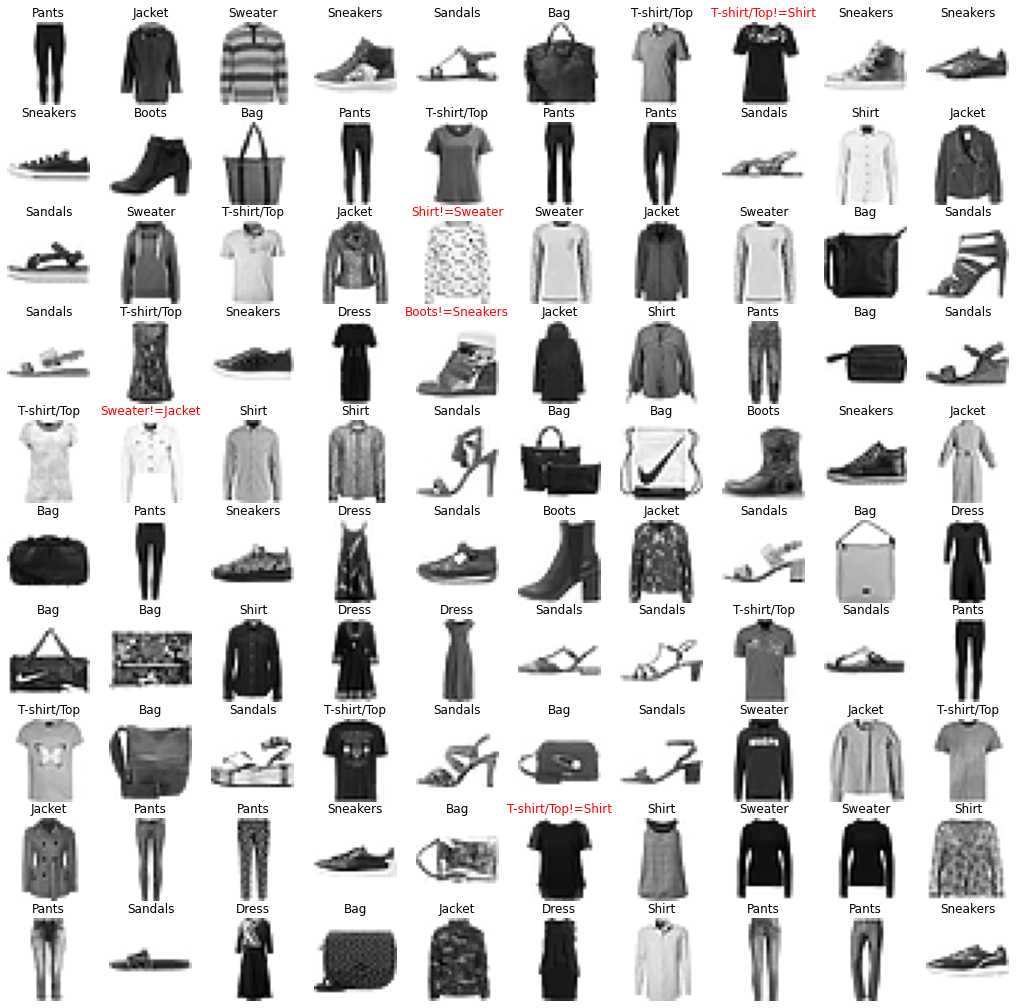

In [15]:
plt.figure(figsize=(18, 18))
true = 0
false = 0
number = 100

def result(prediction_values):
    max = prediction_values.max()
    for i in range(10):
        if prediction_values[0][i] == max:
            return i
            
for i in range(number):
    index = random.randint(0, x_test.shape[0])
    image = x_test[index].reshape(1, 28, 28, 1)
    predictions = model.predict(image, batch_size=1)
    
    plt.subplot(10, 10, i+1)
    plt.imshow(image.reshape(28,28), cmap="binary")
    plt.axis('off')
    
    pred = result(predictions)
    plt.title(pred)
    
    if y_test_original[index] == pred:
        plt.title(fashion_mnist_labels[pred], fontsize=12)
        true += 1
    else:
        #tahmin edilen sınıf != gerçek sınıf
        plt.title(fashion_mnist_labels[pred] + "!=" + fashion_mnist_labels[y_test_original[index]], color='#ff0000', fontsize=12)
        false += 1

In [16]:
plt.show()
print("Number of True Predictions:", true)
print("Number of False Predictions:", false)
print("Accuracy Rate:", (true/(false + true))*100, '%')

Number of True Predictions: 95
Number of False Predictions: 5
Accuracy Rate: 95.0 %
